In [1]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec
import seaborn as sns
from mpl_toolkits import mplot3d
from scipy import stats
%matplotlib inline

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
import pandas_profiling as pp

In [ ]:
from sklearn.linear_model import LinearRegression,LogisticRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import pearsonr


In [8]:
import xgboost as xgb
import lightgbm as lgb


In [10]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval


In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city', 'statezip', 'country']

In [14]:
train0 = pd.read_csv('data.csv')
train0 = train0[features]
train0.head(5)

price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
0   313000.0       3.0       1.50         1340     1.5           0     0   
1  2384000.0       5.0       2.50         3650     2.0           0     4   
2   342000.0       3.0       2.00         1930     1.0           0     0   
3   420000.0       3.0       2.25         2000     1.0           0     0   
4   550000.0       4.0       2.50         1940     1.0           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3        1340              0      1955          2005   
1          5        3370            280      1921             0   
2          4        1930              0      1966             0   
3          4        1000           1000      1963             0   
4          4        1140            800      1976          1992   

                     street       city  statezip country  
0      18810 Densmore Ave N  Shoreline  WA 98133     USA  
1           709 W Blaine St    Seattle  WA 98119     USA  
2  26206-26214 143rd Ave SE       Kent  WA 98042     USA  
3           857 170th Pl NE   Bellevue  WA 98008     USA  
4         9105 170th Ave NE    Redmond  WA 98052     USA

In [15]:
numerics = ['int8', 'int16', 'int32', 'int64', 'float16', 'float32', 'float64']
categorical_columns = []
features = train0.columns.values.tolist()
for col in features:
    if train0[col].dtype in numerics: continue
    categorical_columns.append(col)
# Encoding categorical features
for col in categorical_columns:
    if col in train0.columns:
        le = LabelEncoder()
        le.fit(list(train0[col].astype(str).values))
        train0[col] = le.transform(list(train0[col].astype(str).values))

In [16]:
train0['price'] = (train0['price']).astype(int)
train0['floors'] = (train0['floors']).astype(int)
train0['bedrooms'] = (train0['bedrooms']).astype(int)

In [18]:
train0 = train0.dropna()
train0.head(5)

price  bedrooms  bathrooms  sqft_living  floors  waterfront  view  \
0   313000         3       1.50         1340       1           0     0   
1  2384000         5       2.50         3650       2           0     4   
2   342000         3       2.00         1930       1           0     0   
3   420000         3       2.25         2000       1           0     0   
4   550000         4       2.50         1940       1           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated  street  city  \
0          3        1340              0      1955          2005    1522    36   
1          5        3370            280      1921             0    3899    35   
2          4        1930              0      1966             0    2291    18   
3          4        1000           1000      1963             0    4263     3   
4          4        1140            800      1976          1992    4352    31   

   statezip  country  
0        62        0  
1        58        0  
2        26        0  
3         7        0  
4        31        0

In [19]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   int32  
 1   bedrooms       4600 non-null   int32  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   floors         4600 non-null   int32  
 5   waterfront     4600 non-null   int64  
 6   view           4600 non-null   int64  
 7   condition      4600 non-null   int64  
 8   sqft_above     4600 non-null   int64  
 9   sqft_basement  4600 non-null   int64  
 10  yr_built       4600 non-null   int64  
 11  yr_renovated   4600 non-null   int64  
 12  street         4600 non-null   int32  
 13  city           4600 non-null   int32  
 14  statezip       4600 non-null   int32  
 15  country        4600 non-null   int32  
dtypes: float64(1), int32(7), int64(8)
memory usage: 449.3 KB


In [20]:
train0.corr()

price  bedrooms  bathrooms  sqft_living    floors  \
price          1.000000  0.200336   0.327110     0.430410  0.137125   
bedrooms       0.200336  1.000000   0.545920     0.594884  0.157433   
bathrooms      0.327110  0.545920   1.000000     0.761154  0.498436   
sqft_living    0.430410  0.594884   0.761154     1.000000  0.340993   
floors         0.137125  0.157433   0.498436     0.340993  1.000000   
waterfront     0.135648 -0.003483   0.076232     0.117616  0.017955   
view           0.228504  0.111028   0.211960     0.311009  0.021116   
condition      0.034915  0.025080  -0.119994    -0.062826 -0.306464   
sqft_above     0.367570  0.484705   0.689918     0.876443  0.517319   
sqft_basement  0.210427  0.334165   0.298020     0.447206 -0.253308   
yr_built       0.021857  0.142461   0.463498     0.287775  0.562218   
yr_renovated  -0.028774 -0.061082  -0.215886    -0.122817 -0.247150   
street         0.029366 -0.035507   0.007175     0.006411  0.037869   
city           0.018625 -0.130447  -0.097026    -0.109686  0.035746   
statezip      -0.043385 -0.152773  -0.194497    -0.198918 -0.087240   
country             NaN       NaN        NaN          NaN       NaN   

               waterfront      view  condition  sqft_above  sqft_basement  \
price            0.135648  0.228504   0.034915    0.367570       0.210427   
bedrooms        -0.003483  0.111028   0.025080    0.484705       0.334165   
bathrooms        0.076232  0.211960  -0.119994    0.689918       0.298020   
sqft_living      0.117616  0.311009  -0.062826    0.876443       0.447206   
floors           0.017955  0.021116  -0.306464    0.517319      -0.253308   
waterfront       1.000000  0.360935   0.000352    0.078911       0.097501   
view             0.360935  1.000000   0.063077    0.174327       0.321602   
condition        0.000352  0.063077   1.000000   -0.178196       0.200632   
sqft_above       0.078911  0.174327  -0.178196    1.000000      -0.038723   
sqft_basement    0.097501  0.321602   0.200632   -0.038723       1.000000   
yr_built        -0.023563 -0.064465  -0.399698    0.408535      -0.161675   
yr_renovated     0.008625  0.022967  -0.186818   -0.160426       0.043125   
street           0.035448  0.065077  -0.005480   -0.013709       0.038769   
city             0.001450  0.001340  -0.010592   -0.121701      -0.001559   
statezip         0.007938  0.079340   0.027666   -0.247666       0.047251   
country               NaN       NaN        NaN         NaN            NaN   

               yr_built  yr_renovated    street      city  statezip  country  
price          0.021857     -0.028774  0.029366  0.018625 -0.043385      NaN  
bedrooms       0.142461     -0.061082 -0.035507 -0.130447 -0.152773      NaN  
bathrooms      0.463498     -0.215886  0.007175 -0.097026 -0.194497      NaN  
sqft_living    0.287775     -0.122817  0.006411 -0.109686 -0.198918      NaN  
floors         0.562218     -0.247150  0.037869  0.035746 -0.087240      NaN  
waterfront    -0.023563      0.008625  0.035448  0.001450  0.007938      NaN  
view          -0.064465      0.022967  0.065077  0.001340  0.079340      NaN  
condition     -0.399698     -0.186818 -0.005480 -0.010592  0.027666      NaN  
sqft_above     0.408535     -0.160426 -0.013709 -0.121701 -0.247666      NaN  
sqft_basement -0.161675      0.043125  0.038769 -0.001559  0.047251      NaN  
yr_built       1.000000     -0.321342 -0.066790 -0.211110 -0.339494      NaN  
yr_renovated  -0.321342      1.000000  0.008034  0.075637  0.161278      NaN  
street        -0.066790      0.008034  1.000000  0.095176  0.026673      NaN  
city          -0.211110      0.075637  0.095176  1.000000  0.683512      NaN  
statezip      -0.339494      0.161278  0.026673  0.683512  1.000000      NaN  
country             NaN           NaN       NaN       NaN       NaN      NaN

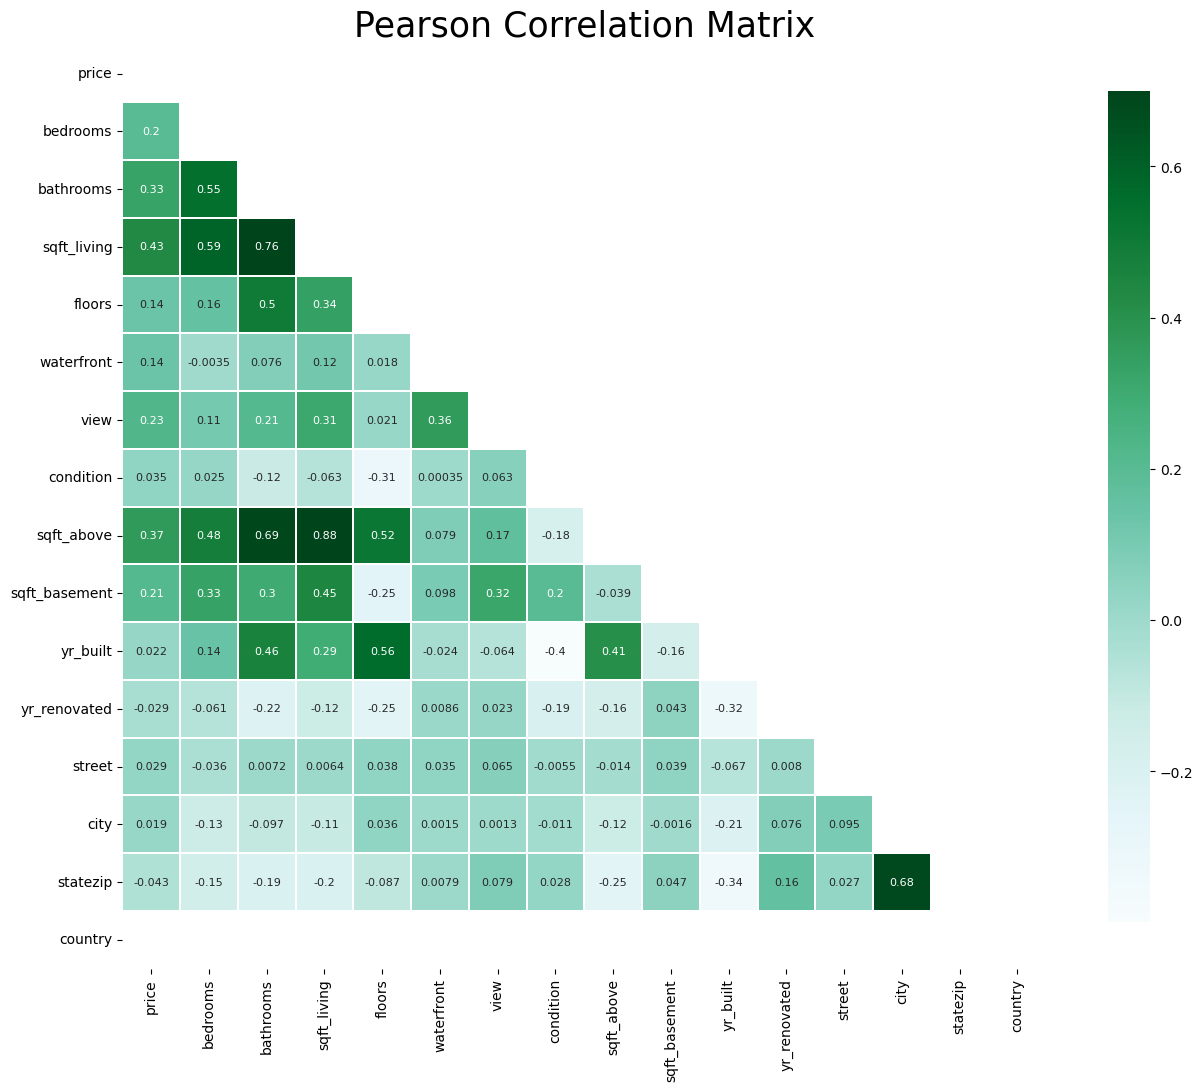

In [21]:
mask = np.zeros_like(train0[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(train0[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

<AxesSubplot:xlabel='yr_built', ylabel='Density'>

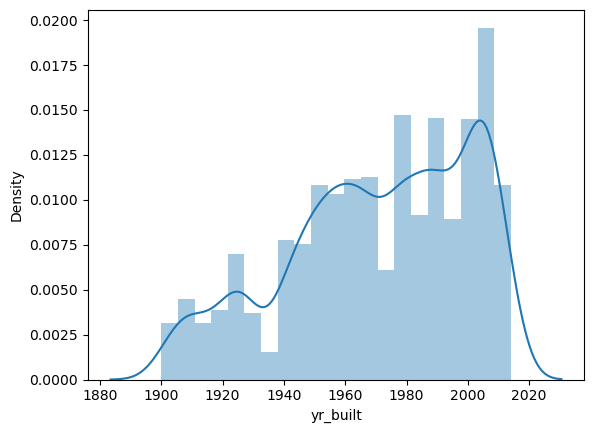

In [22]:
sns.distplot(train0['yr_built'])

In [23]:
train0.describe(percentiles=[.01, .02, .03, .05, .1, .5, .9, .92, .93, .99])

price     bedrooms    bathrooms   sqft_living       floors  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4600.000000   
mean   5.519630e+05     3.400870     2.160815   2139.346957     1.459130   
std    5.638347e+05     0.908848     0.783781    963.206916     0.552194   
min    0.000000e+00     0.000000     0.000000    370.000000     1.000000   
1%     0.000000e+00     2.000000     1.000000    720.000000     1.000000   
2%     1.424860e+05     2.000000     1.000000    800.000000     1.000000   
3%     1.699550e+05     2.000000     1.000000    860.000000     1.000000   
5%     2.000000e+05     2.000000     1.000000    950.000000     1.000000   
10%    2.399500e+05     2.000000     1.000000   1110.000000     1.000000   
50%    4.609430e+05     3.000000     2.250000   1980.000000     1.000000   
90%    9.000000e+05     4.000000     3.000000   3340.000000     2.000000   
92%    9.750000e+05     5.000000     3.250000   3510.800000     2.000000   
93%    1.027210e+06     5.000000     3.250000   3640.700000     2.000000   
99%    2.005220e+06     6.000000     4.500000   5180.100000     3.000000   
max    2.659000e+07     9.000000     8.000000  13540.000000     3.000000   

        waterfront         view    condition   sqft_above  sqft_basement  \
count  4600.000000  4600.000000  4600.000000  4600.000000    4600.000000   
mean      0.007174     0.240652     3.451739  1827.265435     312.081522   
std       0.084404     0.778405     0.677230   862.168977     464.137228   
min       0.000000     0.000000     1.000000   370.000000       0.000000   
1%        0.000000     0.000000     3.000000   709.900000       0.000000   
2%        0.000000     0.000000     3.000000   760.000000       0.000000   
3%        0.000000     0.000000     3.000000   800.000000       0.000000   
5%        0.000000     0.000000     3.000000   860.000000       0.000000   
10%       0.000000     0.000000     3.000000   970.000000       0.000000   
50%       0.000000     0.000000     3.000000  1590.000000       0.000000   
90%       0.000000     0.100000     4.000000  3030.000000    1000.000000   
92%       0.000000     2.000000     5.000000  3160.000000    1070.000000   
93%       0.000000     2.000000     5.000000  3240.000000    1100.000000   
99%       0.000000     4.000000     5.000000  4460.100000    1700.200000   
max       1.000000     4.000000     5.000000  9410.000000    4820.000000   

          yr_built  yr_renovated       street         city     statezip  \
count  4600.000000   4600.000000  4600.000000  4600.000000  4600.000000   
mean   1970.786304    808.608261  2265.385870    25.674348    38.743696   
std      29.731848    979.414536  1307.591795    11.982721    20.919517   
min    1900.000000      0.000000     0.000000     0.000000     0.000000   
1%     1903.000000      0.000000    45.990000     1.000000     0.000000   
2%     1906.000000      0.000000    90.980000     1.000000     1.000000   
3%     1909.000000      0.000000   136.970000     1.000000     2.000000   
5%     1913.000000      0.000000   227.000000     3.000000     4.000000   
10%    1925.000000      0.000000   451.900000     3.000000     8.000000   
50%    1976.000000      0.000000  2263.500000    32.000000    41.000000   
90%    2006.000000   2006.000000  4075.100000    35.000000    67.000000   
92%    2007.000000   2009.000000  4167.080000    36.000000    68.000000   
93%    2008.000000   2009.000000  4211.070000    36.000000    68.000000   
99%    2014.000000   2014.000000  4480.010000    42.000000    74.000000   
max    2014.000000   2014.000000  4524.000000    43.000000    76.000000   

       country  
count   4600.0  
mean       0.0  
std        0.0  
min        0.0  
1%         0.0  
2%         0.0  
3%         0.0  
5%         0.0  
10%        0.0  
50%        0.0  
90%        0.0  
92%        0.0  
93%        0.0  
99%        0.0  
max        0.0

In [24]:
train0 = train0[(
                (train0['price'] <= 1000000) & 
                (train0['price'] > 150000) & 
                (train0['bathrooms'] <= 6) & 
                (train0['condition'] > 2) & 
                (train0['sqft_living'] > 800) & 
                (train0['bedrooms'] >= 1) & 
                (train0['bedrooms'] <= 4.5) 
                )]

In [25]:
train0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3720 entries, 0 to 4599
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          3720 non-null   int32  
 1   bedrooms       3720 non-null   int32  
 2   bathrooms      3720 non-null   float64
 3   sqft_living    3720 non-null   int64  
 4   floors         3720 non-null   int32  
 5   waterfront     3720 non-null   int64  
 6   view           3720 non-null   int64  
 7   condition      3720 non-null   int64  
 8   sqft_above     3720 non-null   int64  
 9   sqft_basement  3720 non-null   int64  
 10  yr_built       3720 non-null   int64  
 11  yr_renovated   3720 non-null   int64  
 12  street         3720 non-null   int32  
 13  city           3720 non-null   int32  
 14  statezip       3720 non-null   int32  
 15  country        3720 non-null   int32  
dtypes: float64(1), int32(7), int64(8)
memory usage: 392.3 KB


In [26]:
pp.ProfileReport(train0)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

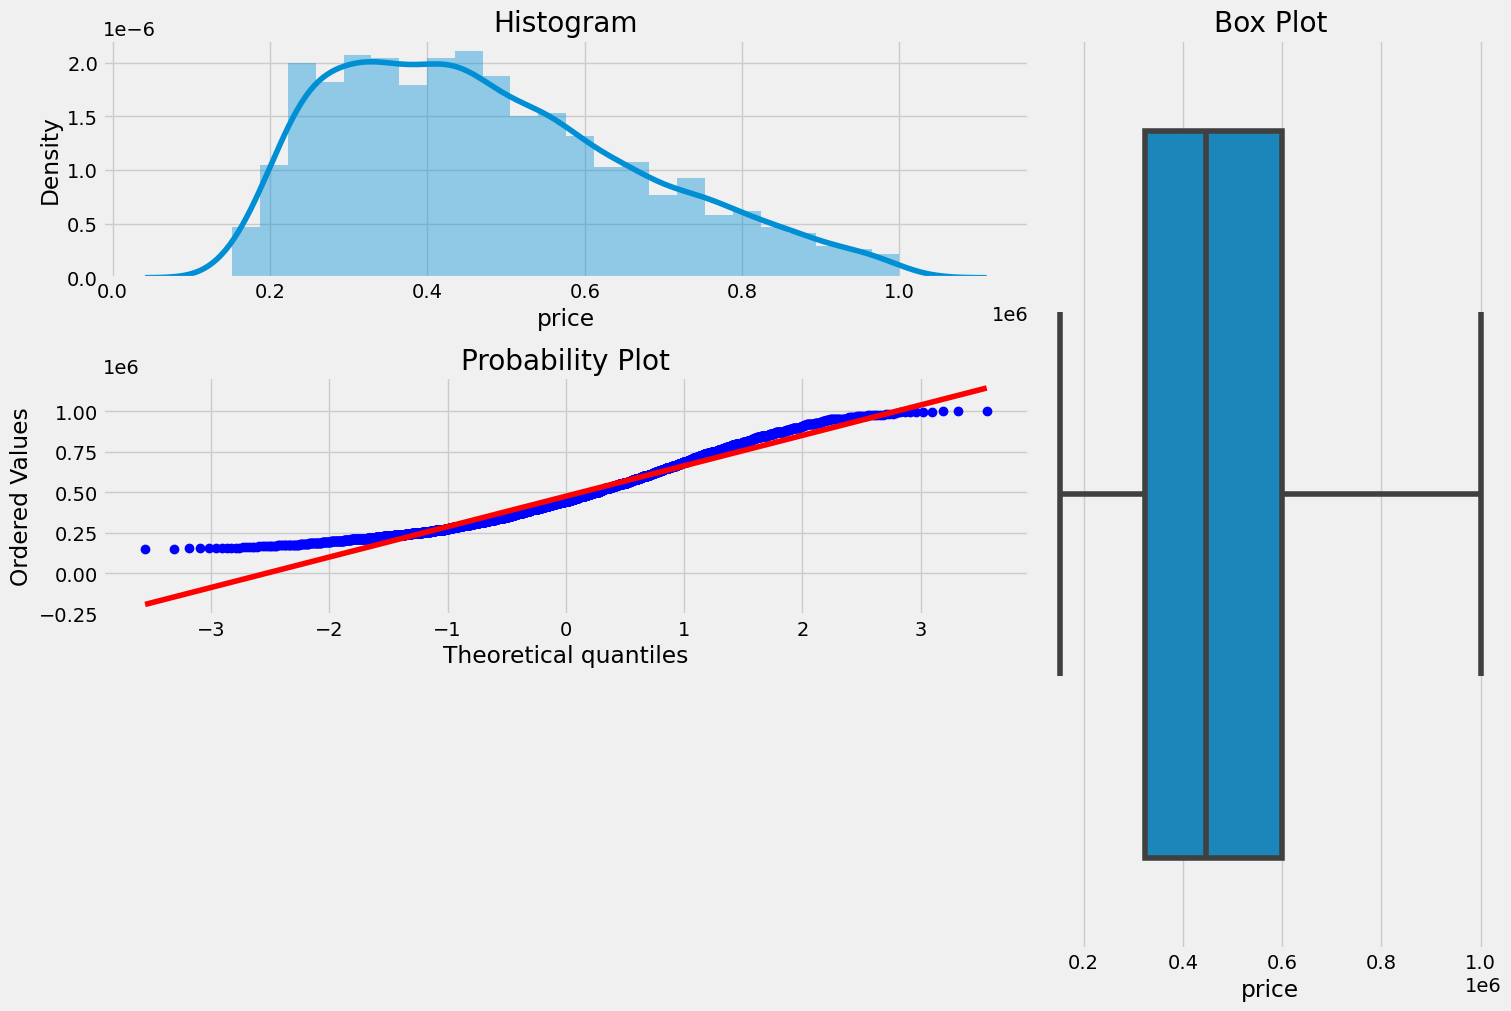

In [27]:
def plotting_3_chart(df, feature):
    style.use('fivethirtyeight')

    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    
    ax1 = fig.add_subplot(grid[0, :2]) 
    ax1.set_title('Histogram') 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)
 
    ax2 = fig.add_subplot(grid[1, :2]) 
    ax2.set_title('QQ_plot') 
    stats.probplot(df.loc[:,feature], plot = ax2)
 
    ax3 = fig.add_subplot(grid[:, 2]) 
    ax3.set_title('Box Plot')
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train0, 'price')

<AxesSubplot:ylabel='price'>

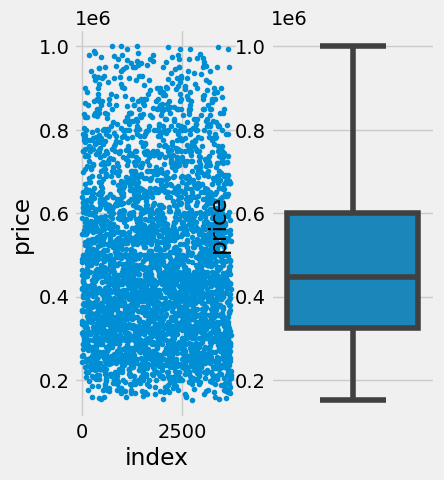

In [28]:
y = np.array(train0.price)
plt.subplot(131)
plt.plot(range(len(y)),y,'.');plt.ylabel('price');plt.xlabel('index');
plt.subplot(132)
sns.boxplot(y=train0.price)

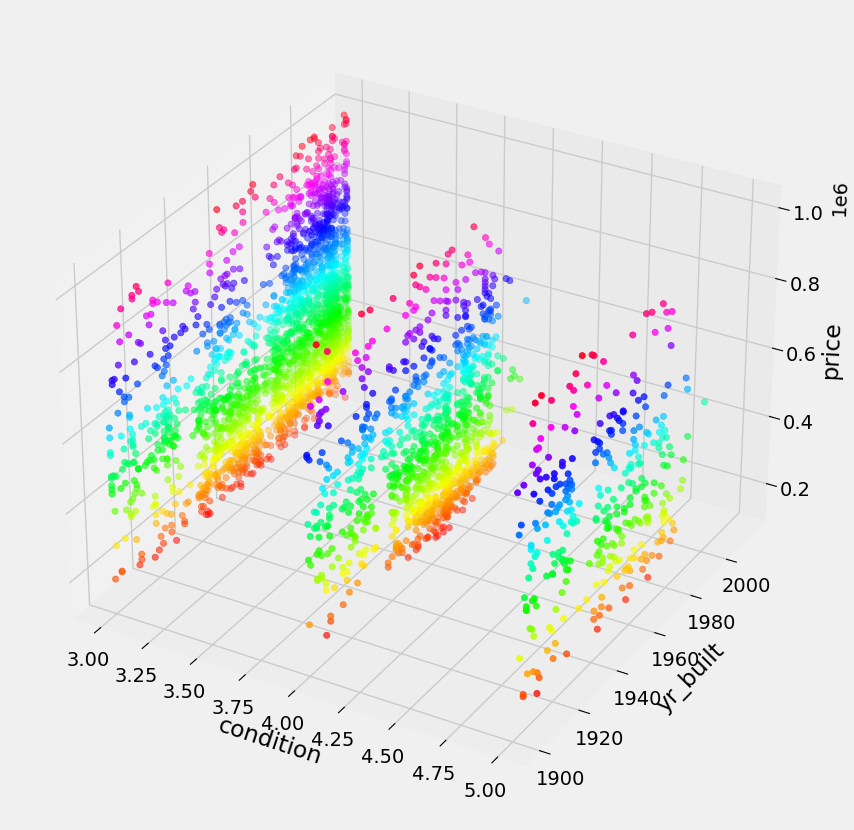

In [29]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

z_points = train0['price']
x_points = train0['condition']
y_points = train0['yr_built']
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

ax.set_xlabel('condition')
ax.set_ylabel('yr_built')
ax.set_zlabel('price')

plt.show()

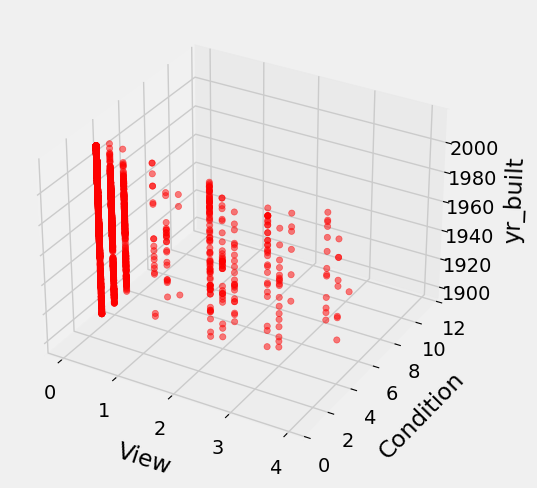

In [30]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(train0['view'],train0['condition'],train0['yr_built'],c="red",alpha=.5)
ax.set(xlabel='\nView',ylabel='\nCondition',zlabel='\nyr_built')
ax.set(ylim=[0,12])
plt.show()

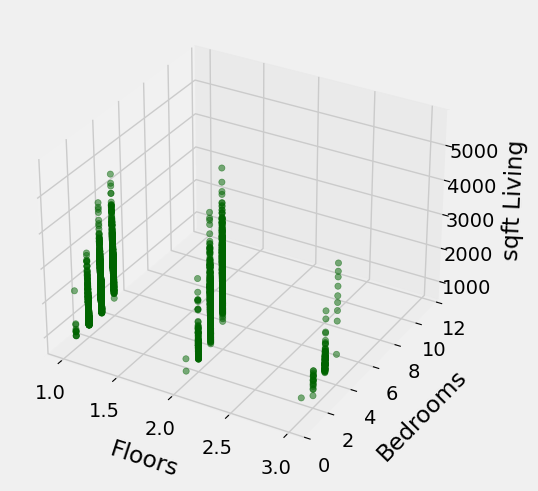

In [31]:
fig=plt.figure(figsize=(19,12.5))
ax=fig.add_subplot(2,2,2, projection="3d")
ax.scatter(train0['floors'],train0['bedrooms'],train0['sqft_living'],c="darkgreen",alpha=.5)
ax.set(xlabel='\nFloors',ylabel='\nBedrooms',zlabel='\nsqft Living')
ax.set(ylim=[0,12])
plt.show()

In [32]:
grpby_bedrooms_df = train0[["price", "bedrooms"]].groupby(by = "bedrooms", as_index = False)
grpby_bedrooms_df = grpby_bedrooms_df.mean().astype(int)
grpby_bedrooms_df.head()

bedrooms   price
0         1  344921
1         2  409449
2         3  444431
3         4  547698

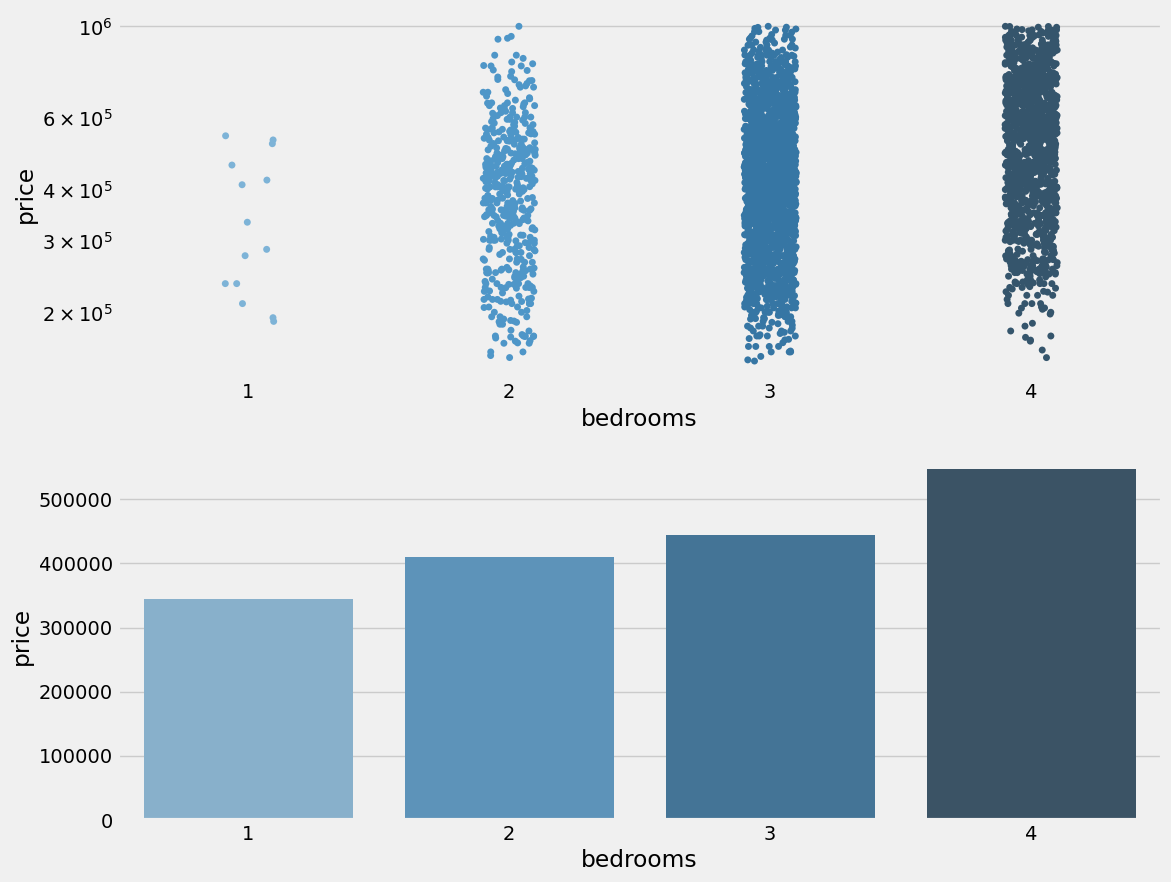

In [33]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
ax1.set(yscale = "log")
sns.stripplot(x = "bedrooms", y = "price", data = train0, ax = ax1, jitter=True, palette="Blues_d")
sns.barplot(x = "bedrooms", y = "price", data = grpby_bedrooms_df, ax = ax2, palette="Blues_d")
plt.show()

In [34]:
train_fe = copy.deepcopy(train0)
target_fe = train_fe['price']
del train_fe['price']

In [35]:
X = train_fe
z = target_fe

In [36]:
Xtrain, Xval, Ztrain, Zval = train_test_split(X, z, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

In [37]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': True,
        'seed':0,        
    }

modelL = lgb.train(params, train_set = train_set, num_boost_round=1000,
                   early_stopping_rounds=50,verbose_eval=10, valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000482 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1970
[LightGBM] [Info] Number of data points in the train set: 2976, number of used features: 14
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 475842.588374
Training until validation scores don't improve for 50 rounds
[10]	valid_0's rmse: 157062
[20]	valid_0's rmse: 134343
[30]	valid_0's rmse: 120403
[40]	valid_0's rmse: 111141
[50]	valid_0's rmse: 105272
[60]	valid_0's rmse: 100314
[70]	valid_0's rmse: 98070.8
[80]	valid_0's rmse: 96103.4
[90]	valid_0's rmse: 9454

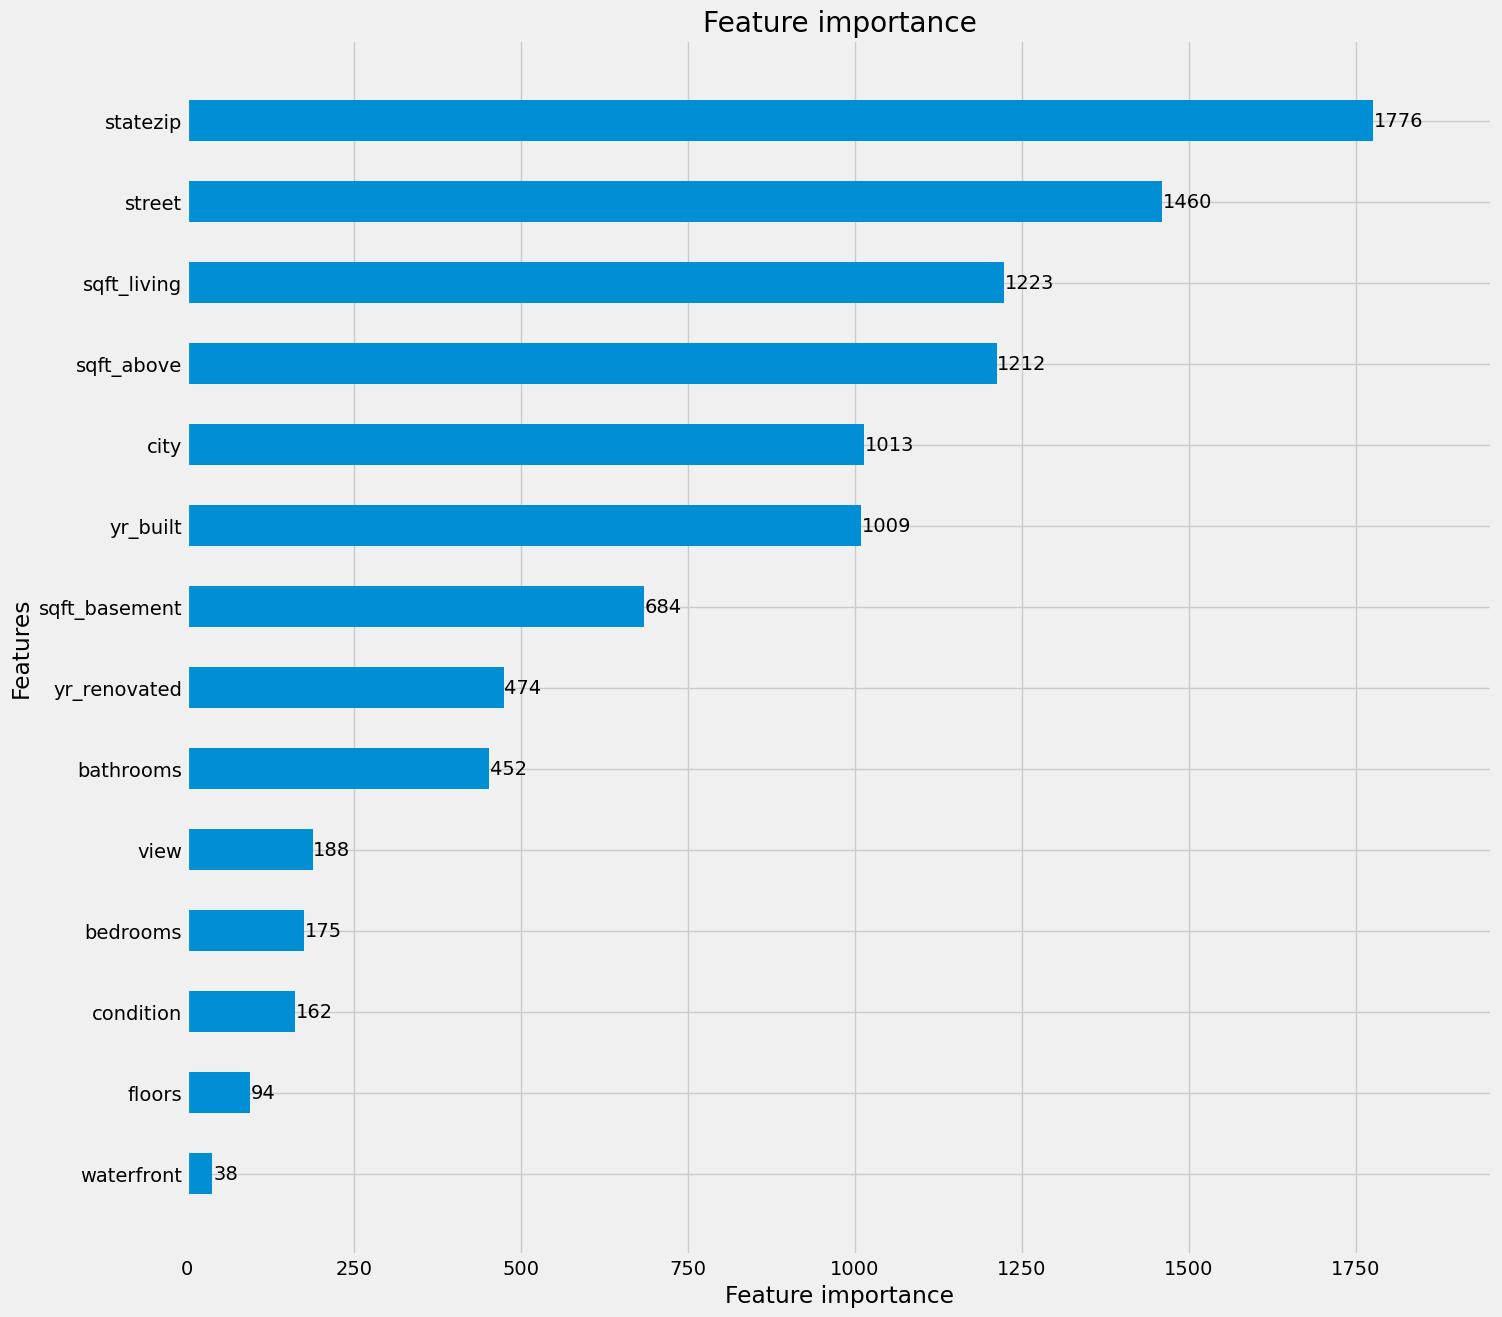

In [38]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();plt.close()

In [39]:
feature_score = pd.DataFrame(train_fe.columns, columns = ['feature']) 
feature_score['score_lgb'] = modelL.feature_importance()

In [40]:
data_tr  = xgb.DMatrix(Xtrain, label=Ztrain)
data_cv  = xgb.DMatrix(Xval   , label=Zval)
evallist = [(data_tr, 'train'), (data_cv, 'valid')]

In [48]:
parms = {'max_depth':8, 
         'objective':'reg:squarederror',
         'eta'      :0.3,
         'subsample':0.8,
         'lambda'  :4,  
         'colsample_bytree':0.9,
         'colsample_bylevel':1,
         'min_child_weight': 10}
modelx = xgb.train(parms, data_tr, num_boost_round=200, evals = evallist,
                  early_stopping_rounds=30, maximize=False, 
                  verbose_eval=10)

print('score = %1.5f, n_boost_round =%d.'%(modelx.best_score,modelx.best_iteration))

[0]	train-rmse:374426.04832	valid-rmse:378311.01011
[10]	train-rmse:85192.49164	valid-rmse:102330.93782
[20]	train-rmse:71259.79080	valid-rmse:96955.58121
[30]	train-rmse:61557.47246	valid-rmse:96529.50668
[40]	train-rmse:54085.73057	valid-rmse:96597.59149
[50]	train-rmse:48257.29970	valid-rmse:97985.98325
[59]	train-rmse:44230.47854	valid-rmse:97650.25640
score = 96330.63819, n_boost_round =29.


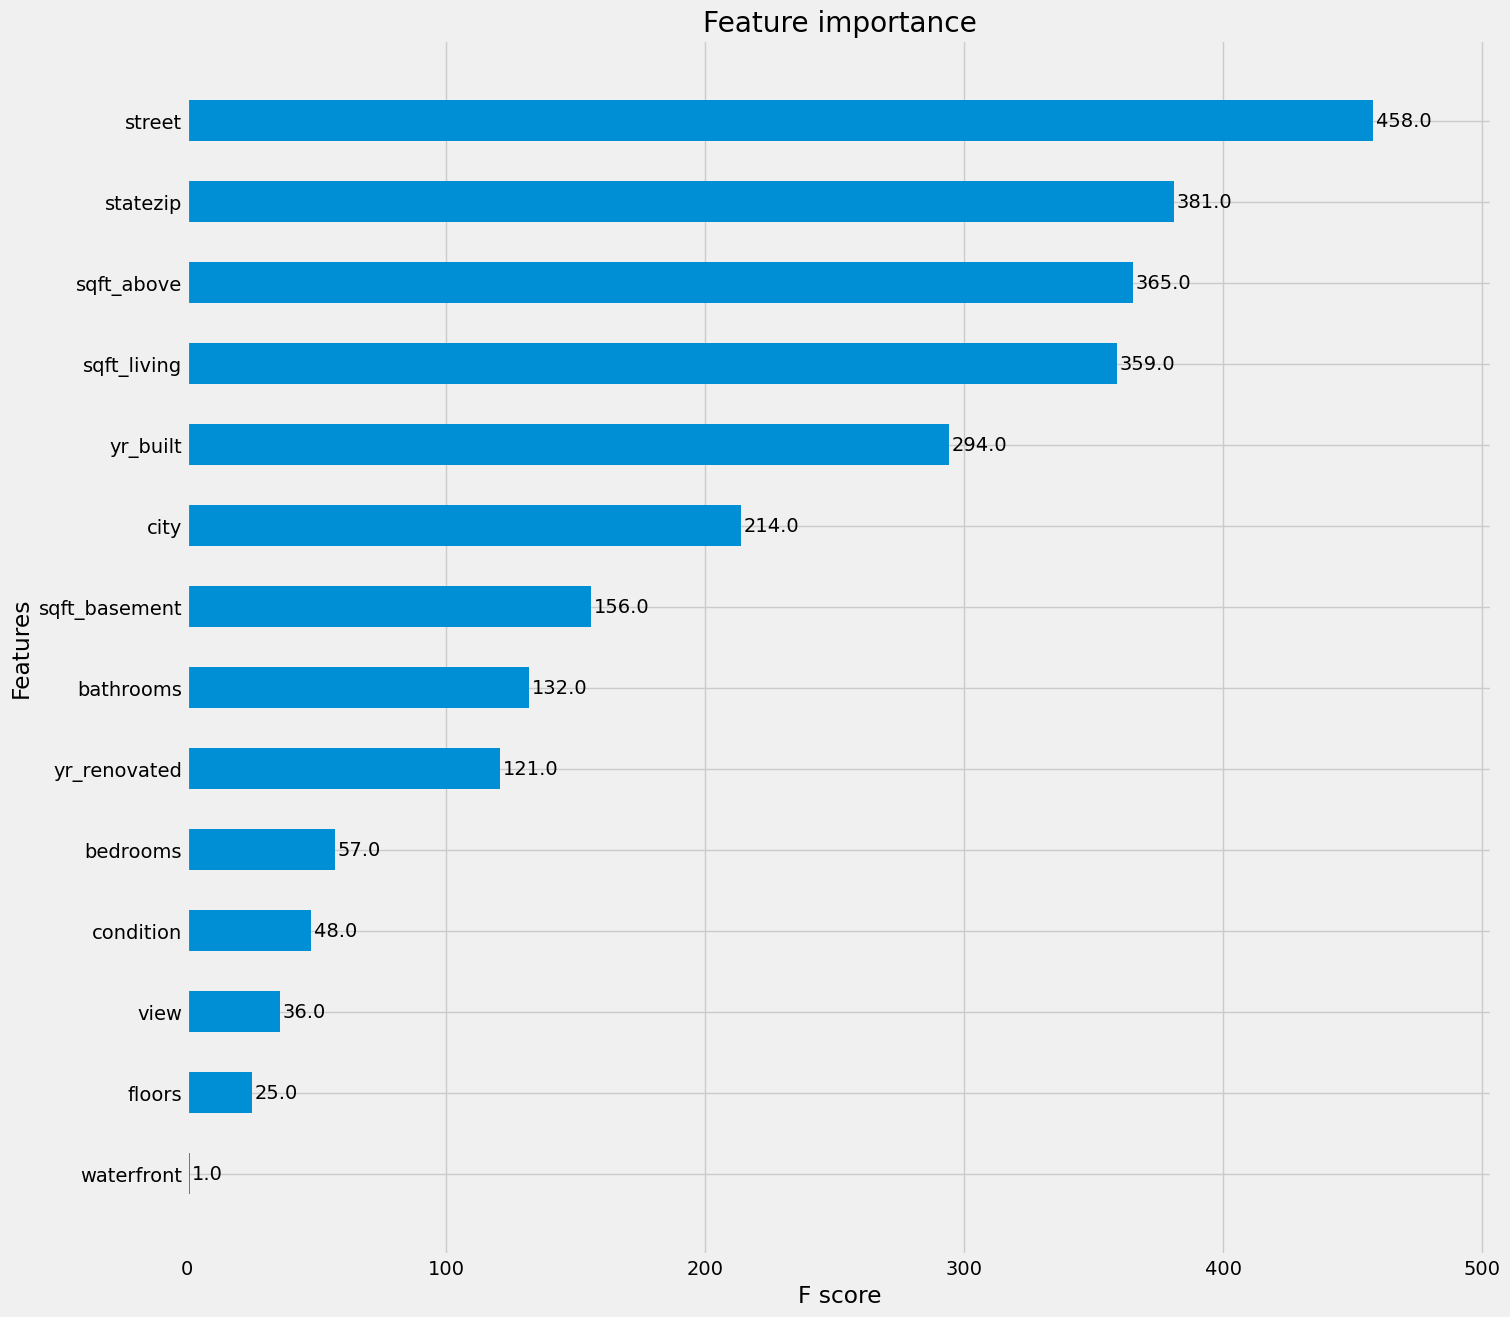

In [49]:
fig =  plt.figure(figsize = (15,15))
axes = fig.add_subplot(111)
xgb.plot_importance(modelx,ax = axes,height = 0.5)
plt.show();plt.close()

In [50]:
feature_score['score_xgb'] = feature_score['feature'].map(modelx.get_score(importance_type='weight'))
feature_score

feature  score_lgb  score_xgb
0        bedrooms        175       57.0
1       bathrooms        452      132.0
2     sqft_living       1223      359.0
3          floors         94       25.0
4      waterfront         38        1.0
5            view        188       36.0
6       condition        162       48.0
7      sqft_above       1212      365.0
8   sqft_basement        684      156.0
9        yr_built       1009      294.0
10   yr_renovated        474      121.0
11         street       1460      458.0
12           city       1013      214.0
13       statezip       1776      381.0
14        country          0        NaN

In [51]:
train_fe = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(train_fe),
    columns=train_fe.columns,
    index=train_fe.index
)

In [57]:
from sklearn.linear_model import LinearRegression,LogisticRegression, SGDRegressor, RidgeCV

In [59]:
logreg = LogisticRegression()
logreg.fit(train_fe, target_fe)
coeff_logreg = pd.DataFrame(train_fe.columns.delete(0))
coeff_logreg.columns = ['feature']
coeff_logreg["score_logreg"] = pd.Series(logreg.coef_[0])
coeff_logreg.sort_values(by='score_logreg', ascending=False)

feature  score_logreg
6      sqft_above      0.230274
13        country      0.108955
4            view     -0.003151
9    yr_renovated     -0.024798
5       condition     -0.034105
0       bathrooms     -0.072025
8        yr_built     -0.114750
7   sqft_basement     -0.132673
2          floors     -0.172876
3      waterfront     -0.206210
1     sqft_living     -0.274042
10         street     -0.321645
11           city     -0.375813
12       statezip     -0.532101

In [60]:
coeff_logreg["score_logreg"] = coeff_logreg["score_logreg"].abs()
feature_score = pd.merge(feature_score, coeff_logreg, on='feature')

In [62]:
linreg = LinearRegression()
linreg.fit(train_fe, target_fe)
coeff_linreg = pd.DataFrame(train_fe.columns.delete(0))
coeff_linreg.columns = ['feature']
coeff_linreg["score_linreg"] = pd.Series(linreg.coef_)
coeff_linreg.sort_values(by='score_linreg', ascending=False)

feature   score_linreg
2          floors  383979.879252
7   sqft_basement  358736.341590
1     sqft_living  172327.946666
12       statezip  161437.496980
8        yr_built  122017.828318
5       condition   95337.374310
3      waterfront   74577.710640
4            view   58201.271352
6      sqft_above   33714.767014
11           city   22486.233400
10         street    2523.593710
0       bathrooms  -56518.652583
13        country  -66204.875887
9    yr_renovated -206054.360218

In [63]:
coeff_linreg["score_linreg"] = coeff_linreg["score_linreg"].abs()
feature_score = pd.merge(feature_score, coeff_linreg, on='feature')
feature_score = feature_score.fillna(0)
feature_score = feature_score.set_index('feature')
feature_score

score_lgb  score_xgb  score_logreg   score_linreg
feature                                                         
bathrooms            452      132.0      0.072025   56518.652583
sqft_living         1223      359.0      0.274042  172327.946666
floors                94       25.0      0.172876  383979.879252
waterfront            38        1.0      0.206210   74577.710640
view                 188       36.0      0.003151   58201.271352
condition            162       48.0      0.034105   95337.374310
sqft_above          1212      365.0      0.230274   33714.767014
sqft_basement        684      156.0      0.132673  358736.341590
yr_built            1009      294.0      0.114750  122017.828318
yr_renovated         474      121.0      0.024798  206054.360218
street              1460      458.0      0.321645    2523.593710
city                1013      214.0      0.375813   22486.233400
statezip            1776      381.0      0.532101  161437.496980
country                0        0.0      0.108955   66204.875887

<AxesSubplot:xlabel='feature'>

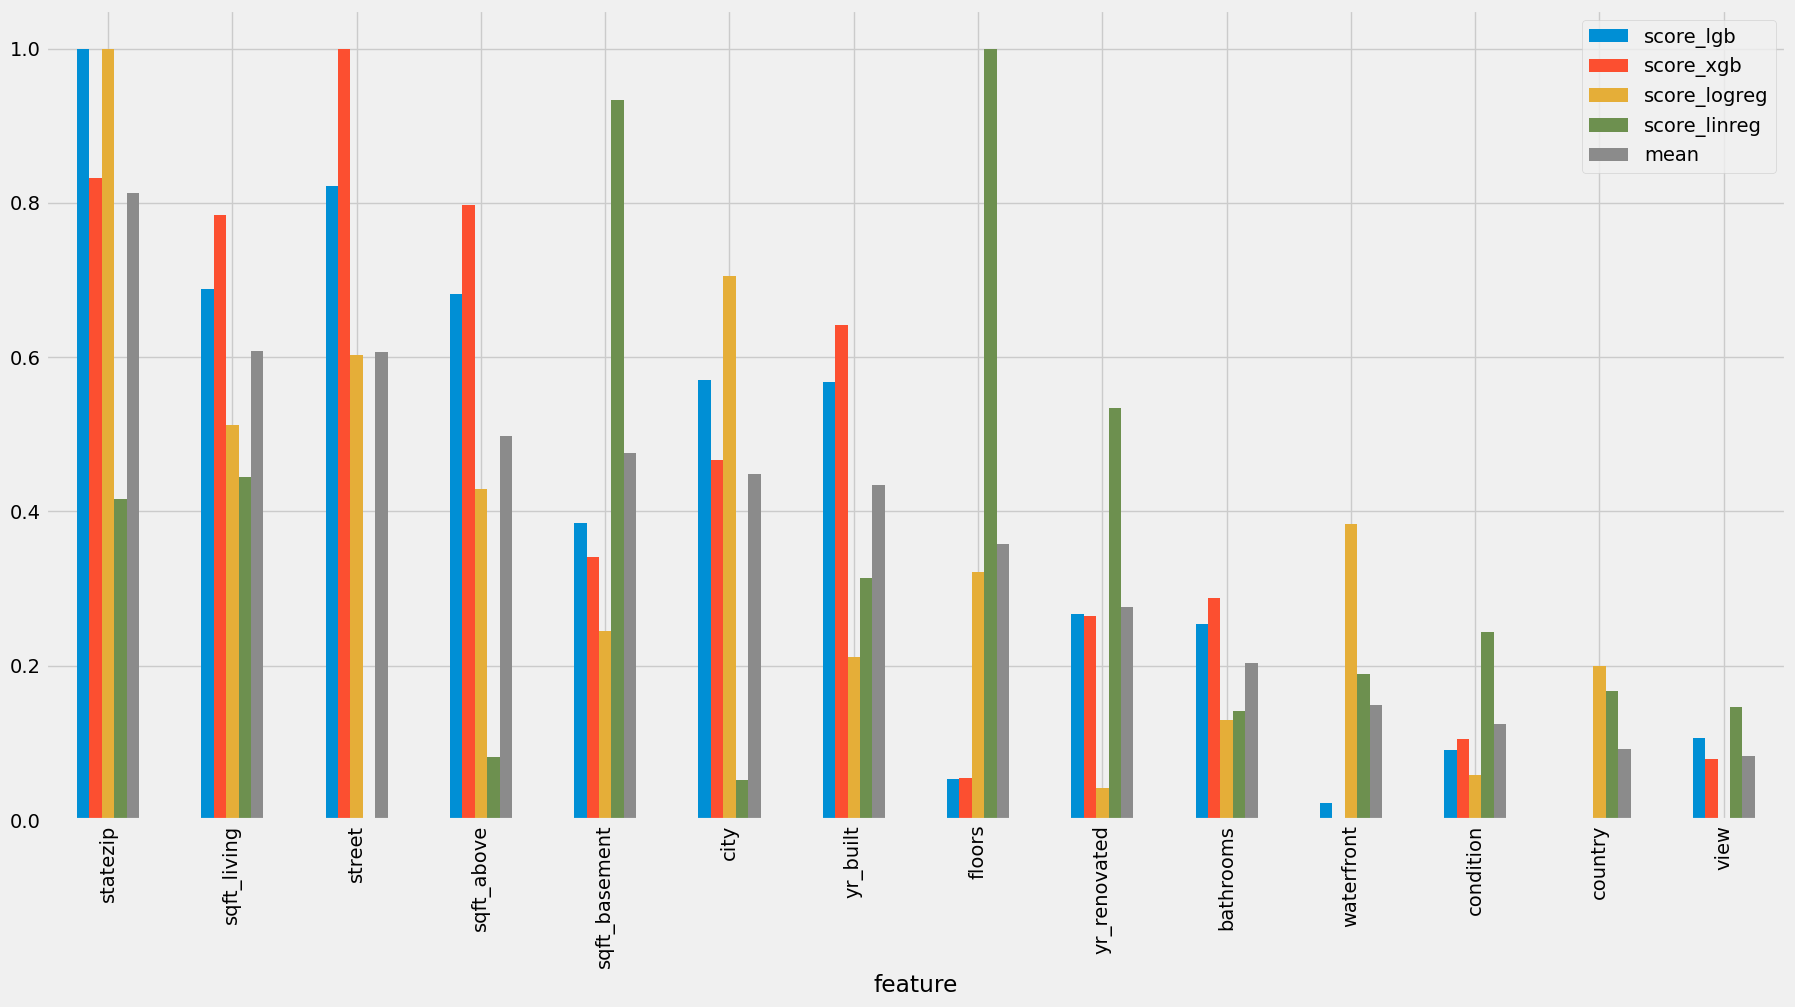

In [64]:
feature_score = pd.DataFrame(
    preprocessing.MinMaxScaler().fit_transform(feature_score),
    columns=feature_score.columns,
    index=feature_score.index
)

feature_score['mean'] = feature_score.mean(axis=1)

feature_score.sort_values('mean', ascending=False).plot(kind='bar', figsize=(20, 10))

In [65]:
feature_score.sort_values('mean', ascending=False)

score_lgb  score_xgb  score_logreg  score_linreg      mean
feature                                                                  
statezip        1.000000   0.831878      1.000000      0.416598  0.812119
sqft_living     0.688626   0.783843      0.512129      0.445148  0.607436
street          0.822072   1.000000      0.602125      0.000000  0.606049
sqft_above      0.682432   0.796943      0.429384      0.081769  0.497632
sqft_basement   0.385135   0.340611      0.244867      0.933823  0.476109
city            0.570383   0.467249      0.704532      0.052333  0.448624
yr_built        0.568131   0.641921      0.210982      0.313258  0.433573
floors          0.052928   0.054585      0.320870      1.000000  0.357096
yr_renovated    0.266892   0.264192      0.040923      0.533562  0.276392
bathrooms       0.254505   0.288210      0.130209      0.141550  0.203618
waterfront      0.021396   0.002183      0.383891      0.188892  0.149091
condition       0.091216   0.104803      0.058519      0.243314  0.124463
country         0.000000   0.000000      0.200026      0.166943  0.091742
view            0.105856   0.078603      0.000000      0.145961  0.082605

<AxesSubplot:xlabel='feature'>

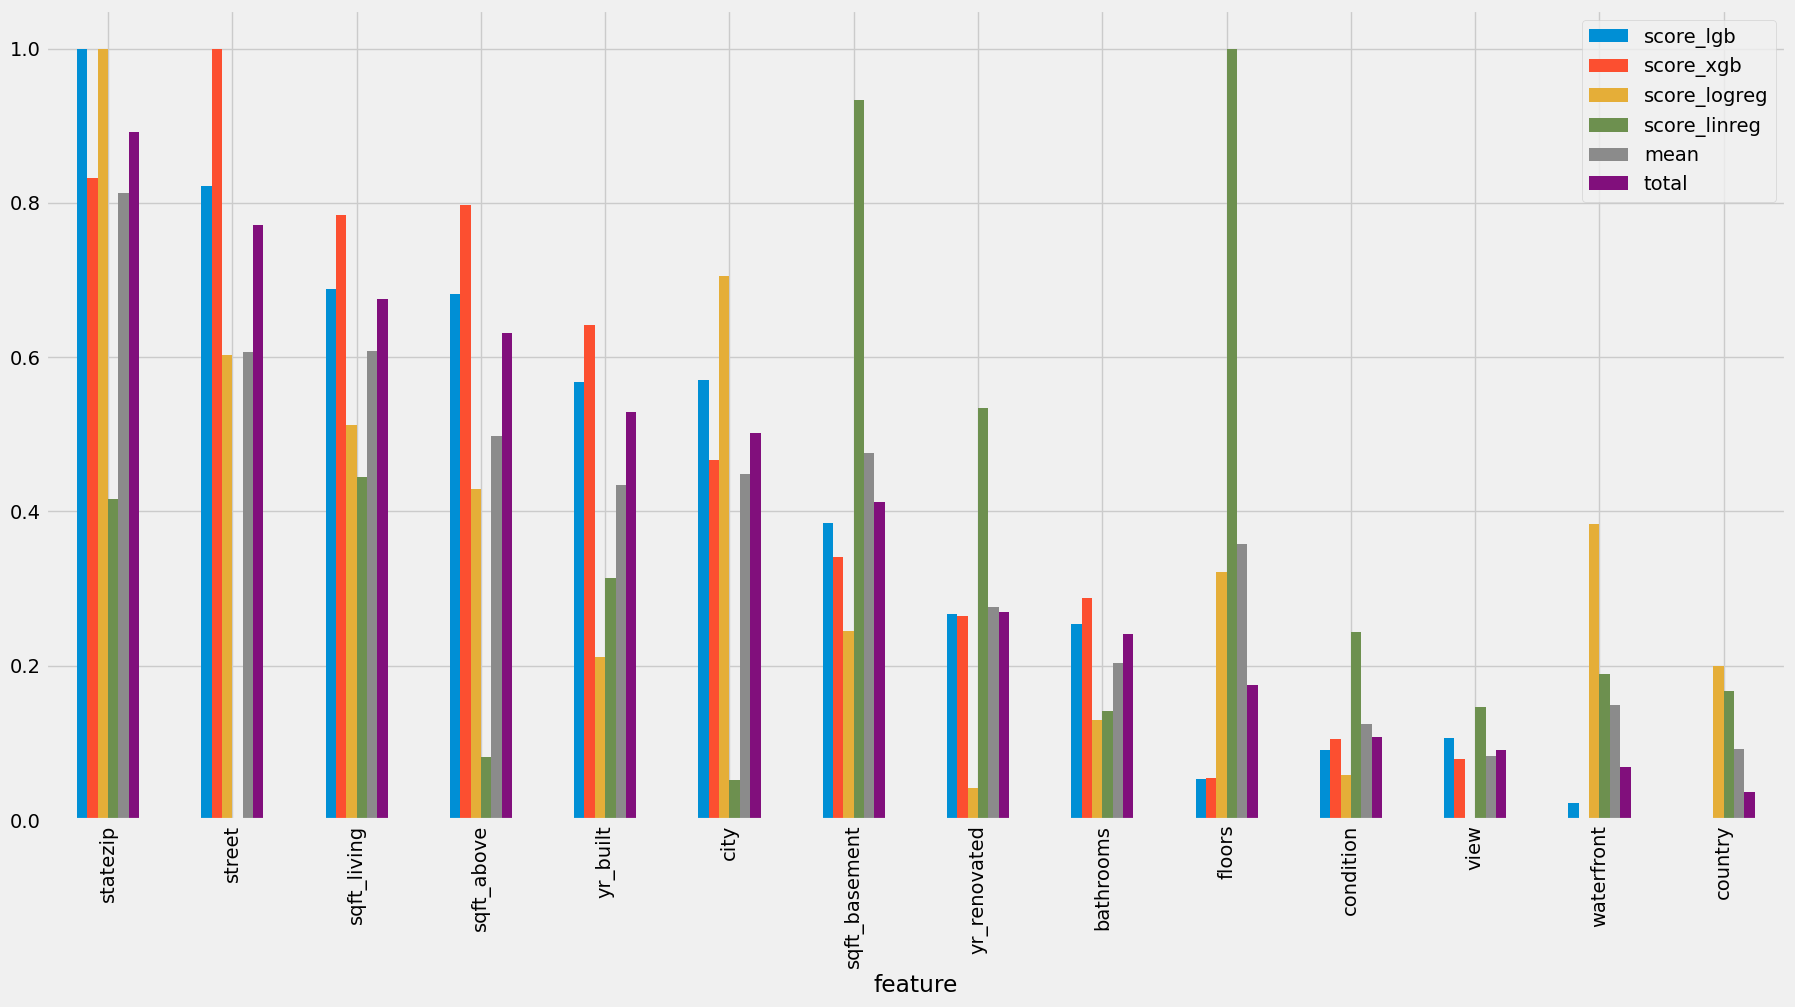

In [66]:
feature_score['total'] = 0.5*feature_score['score_lgb'] + 0.3*feature_score['score_xgb'] \
                       + 0.1*feature_score['score_logreg'] + 0.1*feature_score['score_linreg']

feature_score.sort_values('total', ascending=False).plot(kind='bar', figsize=(20, 10))

In [67]:
feature_score.sort_values('total', ascending=False)

score_lgb  score_xgb  score_logreg  score_linreg      mean  \
feature                                                                     
statezip        1.000000   0.831878      1.000000      0.416598  0.812119   
street          0.822072   1.000000      0.602125      0.000000  0.606049   
sqft_living     0.688626   0.783843      0.512129      0.445148  0.607436   
sqft_above      0.682432   0.796943      0.429384      0.081769  0.497632   
yr_built        0.568131   0.641921      0.210982      0.313258  0.433573   
city            0.570383   0.467249      0.704532      0.052333  0.448624   
sqft_basement   0.385135   0.340611      0.244867      0.933823  0.476109   
yr_renovated    0.266892   0.264192      0.040923      0.533562  0.276392   
bathrooms       0.254505   0.288210      0.130209      0.141550  0.203618   
floors          0.052928   0.054585      0.320870      1.000000  0.357096   
condition       0.091216   0.104803      0.058519      0.243314  0.124463   
view            0.105856   0.078603      0.000000      0.145961  0.082605   
waterfront      0.021396   0.002183      0.383891      0.188892  0.149091   
country         0.000000   0.000000      0.200026      0.166943  0.091742   

                  total  
feature                  
statezip       0.891223  
street         0.771248  
sqft_living    0.675194  
sqft_above     0.631414  
yr_built       0.529066  
city           0.501053  
sqft_basement  0.412620  
yr_renovated   0.270152  
bathrooms      0.240891  
floors         0.174927  
condition      0.107232  
view           0.091105  
waterfront     0.068632  
country        0.036697

In [68]:
target_name = 'price'
train_target0 = train0[target_name]
train0 = train0.drop([target_name], axis=1)

In [69]:
train0, test0, train_target0, test_target0 = train_test_split(train0, train_target0, test_size=0.2, random_state=0)

In [70]:
train0b = train0
train_target0b = train_target0
trainb, testb, targetb, target_testb = train_test_split(train0b, train_target0b, test_size=valid_part, random_state=0)

In [71]:
scaler = StandardScaler()
train0 = pd.DataFrame(scaler.fit_transform(train0), columns = train0.columns)

In [72]:
train0.head(3)

bedrooms  bathrooms  sqft_living    floors  waterfront     view  condition  \
0  1.159940  -0.474931    -0.213526 -0.816707   -0.058065 -0.25505   0.861578   
1 -0.335072   0.666744    -0.397024  0.971755   -0.058065 -0.25505  -0.694281   
2 -1.830083  -1.616606    -1.003980 -0.816707   -0.058065 -0.25505  -0.694281   

   sqft_above  sqft_basement  yr_built  yr_renovated    street      city  \
0   -0.911472       1.215224  0.273110     -0.836333 -1.295291 -0.659430   
1   -0.026586      -0.669818  1.052604     -0.836333  1.503512 -0.996031   
2   -1.477219       0.782174 -1.590898      1.203588  1.501974  0.771122   

   statezip  country  
0 -0.969958      0.0  
1 -1.261652      0.0  
2  0.828817      0.0

In [73]:
len(train0)

2976

In [74]:
train, test, target, target_test = train_test_split(train0, train_target0, test_size=valid_part, random_state=0)

In [75]:
train.head(3)

bedrooms  bathrooms  sqft_living    floors  waterfront     view  \
2456 -1.830083  -1.616606    -0.919288 -0.816707   -0.058065 -0.25505   
2880 -0.335072   0.666744    -0.411140  2.760217   -0.058065 -0.25505   
1485 -0.335072   0.666744     0.280507  0.971755   -0.058065 -0.25505   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated    street  \
2456   0.861578   -0.563320      -0.669818 -2.133155      1.190342 -0.468267   
2880  -0.694281   -0.041092      -0.669818 -2.133155      1.199512  0.477233   
1485  -0.694281    0.669718      -0.669818  1.052604     -0.836333 -0.669061   

          city  statezip  country  
2456  0.771122  1.217741      0.0  
2880  0.771122  0.439892      0.0  
1485 -0.827731 -1.067190      0.0

In [76]:
test.head(3)

bedrooms  bathrooms  sqft_living    floors  waterfront     view  \
2783 -0.335072  -0.855489    -0.989865  0.971755   -0.058065 -0.25505   
2188 -1.830083  -1.616606    -1.258054 -0.816707   -0.058065 -0.25505   
2440 -0.335072  -0.474931     0.012318 -0.816707   -0.058065 -0.25505   

      condition  sqft_above  sqft_basement  yr_built  yr_renovated    street  \
2783  -0.694281   -0.911472      -0.185821  1.086495      1.204607  0.512622   
2188  -0.694281   -0.911472      -0.669818 -0.472493      1.205626 -1.433000   
2440   0.861578    0.394098      -0.669818  0.035873     -0.836333  0.349525   

          city  statezip  country  
2783  0.771122  1.703896      0.0  
2188  0.518671 -0.143494      0.0  
2440 -1.921682 -1.553345      0.0

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083 entries, 2456 to 2732
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       2083 non-null   float64
 1   bathrooms      2083 non-null   float64
 2   sqft_living    2083 non-null   float64
 3   floors         2083 non-null   float64
 4   waterfront     2083 non-null   float64
 5   view           2083 non-null   float64
 6   condition      2083 non-null   float64
 7   sqft_above     2083 non-null   float64
 8   sqft_basement  2083 non-null   float64
 9   yr_built       2083 non-null   float64
 10  yr_renovated   2083 non-null   float64
 11  street         2083 non-null   float64
 12  city           2083 non-null   float64
 13  statezip       2083 non-null   float64
 14  country        2083 non-null   float64
dtypes: float64(15)
memory usage: 260.4 KB


In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893 entries, 2783 to 988
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       893 non-null    float64
 1   bathrooms      893 non-null    float64
 2   sqft_living    893 non-null    float64
 3   floors         893 non-null    float64
 4   waterfront     893 non-null    float64
 5   view           893 non-null    float64
 6   condition      893 non-null    float64
 7   sqft_above     893 non-null    float64
 8   sqft_basement  893 non-null    float64
 9   yr_built       893 non-null    float64
 10  yr_renovated   893 non-null    float64
 11  street         893 non-null    float64
 12  city           893 non-null    float64
 13  statezip       893 non-null    float64
 14  country        893 non-null    float64
dtypes: float64(15)
memory usage: 111.6 KB


In [79]:
acc_train_r2 = []
acc_test_r2 = []
acc_train_d = []
acc_test_d = []
acc_train_rmse = []
acc_test_rmse = []

In [80]:
def acc_d(y_meas, y_pred):
    return mean_absolute_error(y_meas, y_pred)*len(y_meas)/sum(abs(y_meas))

def acc_rmse(y_meas, y_pred):
    return (mean_squared_error(y_meas, y_pred))**0.5

In [81]:
def acc_boosting_model(num,model,train,test,num_iteration=0):
    
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    if num_iteration > 0:
        ytrain = model.predict(train, num_iteration = num_iteration)  
        ytest = model.predict(test, num_iteration = num_iteration)
    else:
        ytrain = model.predict(train)  
        ytest = model.predict(test)

    print('target = ', targetb[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(targetb, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(targetb, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(targetb, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_testb[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_testb, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_testb, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_testb, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [82]:
def acc_model(num,model,train,test):   
  
    global acc_train_r2, acc_test_r2, acc_train_d, acc_test_d, acc_train_rmse, acc_test_rmse
    
    ytrain = model.predict(train)  
    ytest = model.predict(test)

    print('target = ', target[:5].values)
    print('ytrain = ', ytrain[:5])

    acc_train_r2_num = round(r2_score(target, ytrain) * 100, 2)
    print('acc(r2_score) for train =', acc_train_r2_num)   
    acc_train_r2.insert(num, acc_train_r2_num)

    acc_train_d_num = round(acc_d(target, ytrain) * 100, 2)
    print('acc(relative error) for train =', acc_train_d_num)   
    acc_train_d.insert(num, acc_train_d_num)

    acc_train_rmse_num = round(acc_rmse(target, ytrain) * 100, 2)
    print('acc(rmse) for train =', acc_train_rmse_num)   
    acc_train_rmse.insert(num, acc_train_rmse_num)

    print('target_test =', target_test[:5].values)
    print('ytest =', ytest[:5])
    
    acc_test_r2_num = round(r2_score(target_test, ytest) * 100, 2)
    print('acc(r2_score) for test =', acc_test_r2_num)
    acc_test_r2.insert(num, acc_test_r2_num)
    
    acc_test_d_num = round(acc_d(target_test, ytest) * 100, 2)
    print('acc(relative error) for test =', acc_test_d_num)
    acc_test_d.insert(num, acc_test_d_num)
    
    acc_test_rmse_num = round(acc_rmse(target_test, ytest) * 100, 2)
    print('acc(rmse) for test =', acc_test_rmse_num)
    acc_test_rmse.insert(num, acc_test_rmse_num)

In [84]:
from sklearn.ensemble import RandomForestRegressor

In [86]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [87]:
random_forest = RandomForestRegressor()
random_forest.fit(train, target)
acc_model(1,random_forest,train,test)

target =  [395000 670000 619500 400000 700000]
ytrain =  [438157.32 693969.61 574002.95 439595.68 705938.3 ]
acc(r2_score) for train = 95.63
acc(relative error) for train = 6.12
acc(rmse) for train = 4018903.36
target_test = [386000 230000 530000 569000 710000]
ytest = [421788.54 253913.82 540782.43 576855.12 560594.5 ]
acc(r2_score) for test = 68.76
acc(relative error) for test = 15.73
acc(rmse) for test = 10454839.85


In [97]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold

In [115]:
Xtrain, Xval, Ztrain, Zval = train_test_split(trainb, targetb, test_size=0.2, random_state=0)
train_set = lgb.Dataset(Xtrain, Ztrain, silent=False)
valid_set = lgb.Dataset(Xval, Zval, silent=False)

In [116]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'num_leaves': 31,
        'learning_rate': 0.01,
        'max_depth': -1,
        'subsample': 0.8,
        'bagging_fraction' : 1,
        'max_bin' : 5000 ,
        'bagging_freq': 20,
        'colsample_bytree': 0.6,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1,
        'zero_as_missing': False,
        'seed':0,        
    }
modelL = lgb.train(params, train_set = train_set, num_boost_round=10000,
                   early_stopping_rounds=8000,verbose_eval=500, valid_sets=valid_set)

[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train set: 1666, number of used features: 13
[LightGBM] [Warning] bagging_fraction is set=1, subsample=0.8 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Info] Start training from score 474654.976591
Training until validation scores don't improve for 8000 rounds
[500]	valid_0's rmse: 96275.7
[1000]	valid_0's rmse: 93766.8
[1500]	valid_0's rmse: 94144.3
[2000]	valid_0's rmse: 94820.1
[2500]	valid_0's rmse: 95325.9
[3000]	valid_0's rmse: 95699.3


In [117]:
acc_boosting_model(3,modelL,trainb,testb,modelL.best_iteration)

target =  [395000 670000 619500 400000 700000]
ytrain =  [438121.48874435 690140.01662912 586421.94535334 485574.85322179
 717502.71576394]
acc(r2_score) for train = 90.55
acc(relative error) for train = 8.61
acc(rmse) for train = 5912060.66
target_test = [386000 230000 530000 569000 710000]
ytest = [512608.57518481 255825.58615699 552465.04160936 576602.32274475
 617942.51396209]
acc(r2_score) for test = 75.66
acc(relative error) for test = 13.91
acc(rmse) for test = 9227667.68


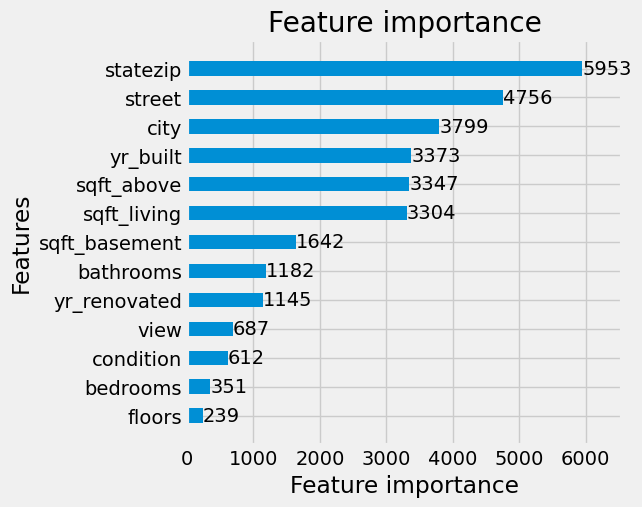

In [118]:
fig =  plt.figure(figsize = (5,5))
axes = fig.add_subplot(111)
lgb.plot_importance(modelL,ax = axes,height = 0.5)
plt.show();
plt.close()

In [120]:
models = pd.DataFrame({
    'Model': ['Random Forest', 'LGBM'],
    
    'r2_train': acc_train_r2,
    'r2_test': acc_test_r2,
    'd_train': acc_train_d,
    'd_test': acc_test_d,
    'rmse_train': acc_train_rmse,
    'rmse_test': acc_test_rmse
                     })

In [121]:
pd.options.display.float_format = '{:,.2f}'.format

In [122]:
print('Prediction accuracy for models by R2 criterion - r2_test')
models.sort_values(by=['r2_test', 'r2_train'], ascending=False)

Prediction accuracy for models by R2 criterion - r2_test


Model  r2_train  r2_test  d_train  d_test   rmse_train  \
1           LGBM     90.55    75.66     8.61   13.91 5,912,060.66   
0  Random Forest     95.63    68.76     6.12   15.73 4,018,903.36   

      rmse_test  
1  9,227,667.68  
0 10,454,839.85

In [123]:
print('Prediction accuracy for models by relative error - d_test')
models.sort_values(by=['d_test', 'd_train'], ascending=True)

Prediction accuracy for models by relative error - d_test


Model  r2_train  r2_test  d_train  d_test   rmse_train  \
1           LGBM     90.55    75.66     8.61   13.91 5,912,060.66   
0  Random Forest     95.63    68.76     6.12   15.73 4,018,903.36   

      rmse_test  
1  9,227,667.68  
0 10,454,839.85

In [124]:
print('Prediction accuracy for models by RMSE - rmse_test')
models.sort_values(by=['rmse_test', 'rmse_train'], ascending=True)

Prediction accuracy for models by RMSE - rmse_test


Model  r2_train  r2_test  d_train  d_test   rmse_train  \
1           LGBM     90.55    75.66     8.61   13.91 5,912,060.66   
0  Random Forest     95.63    68.76     6.12   15.73 4,018,903.36   

      rmse_test  
1  9,227,667.68  
0 10,454,839.85

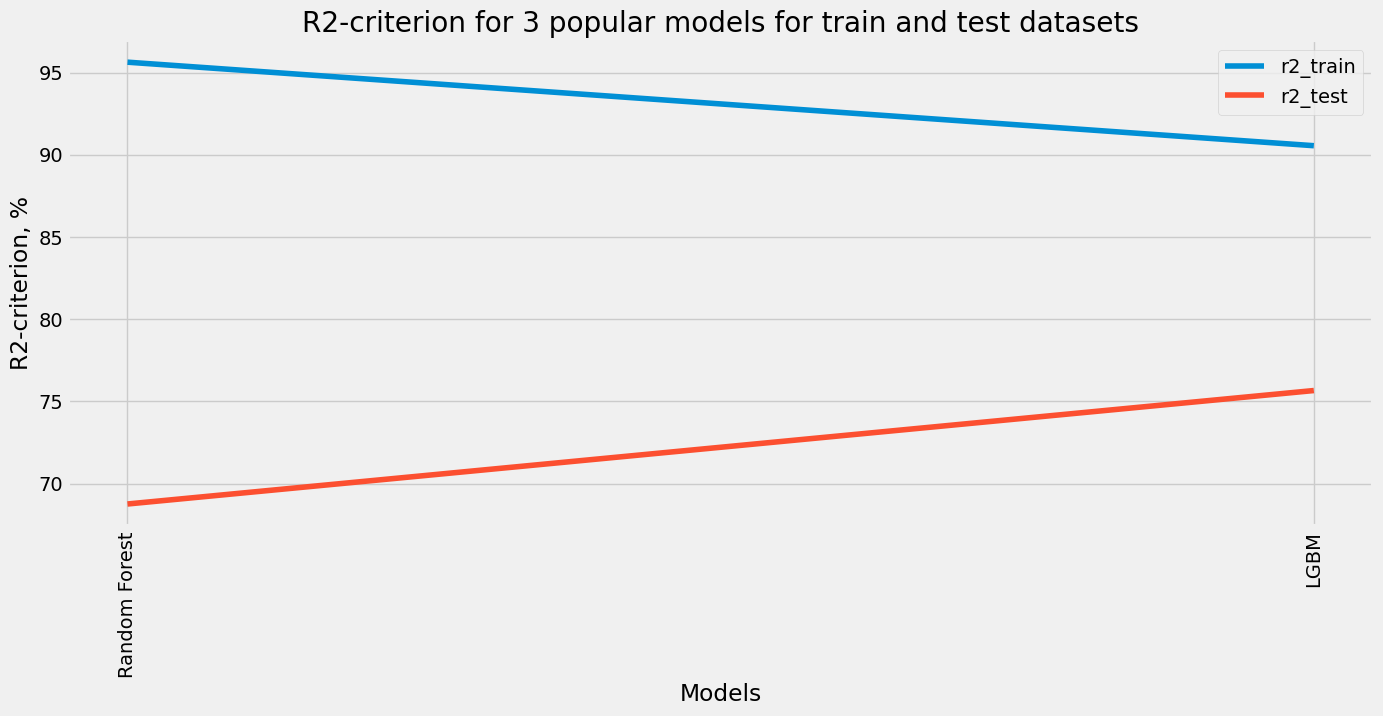

In [125]:
plt.figure(figsize=[15,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['r2_train'], label = 'r2_train')
plt.plot(xx, models['r2_test'], label = 'r2_test')
plt.legend()
plt.title('R2-criterion for 3 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('R2-criterion, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

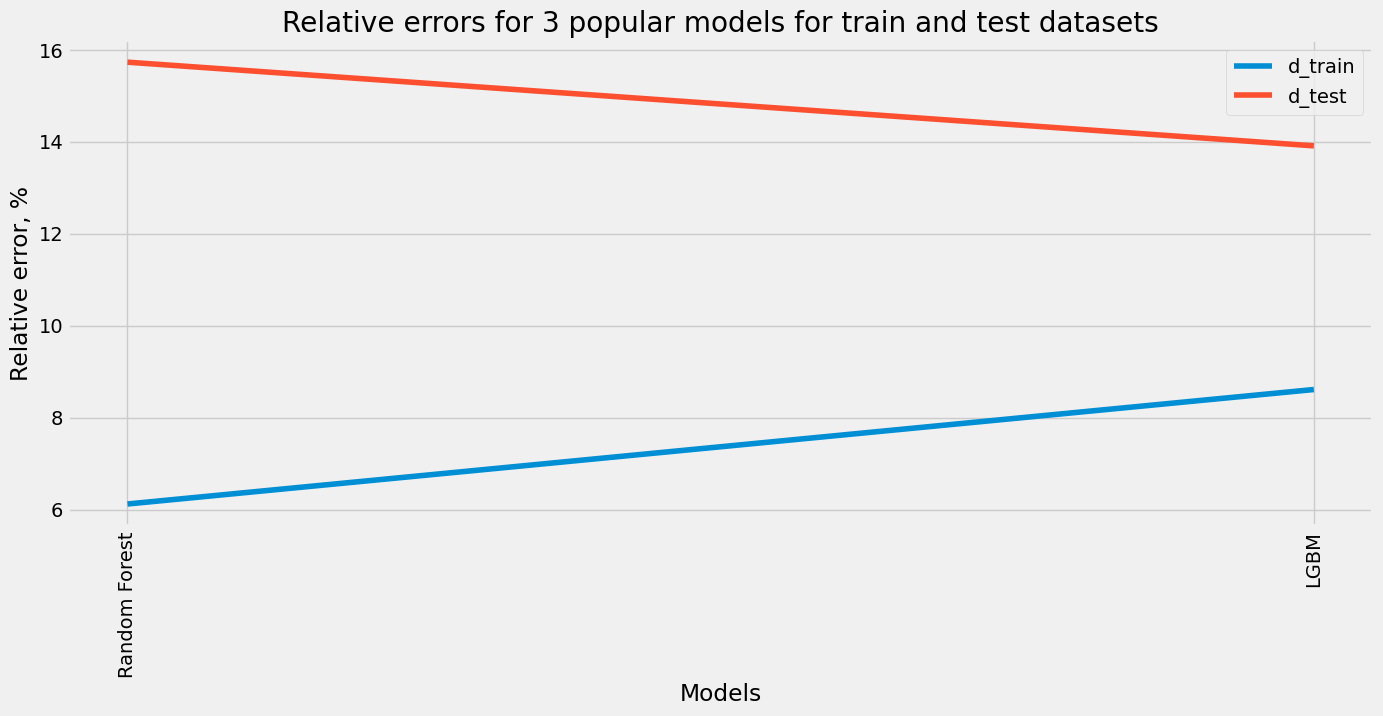

In [126]:
plt.figure(figsize=[15,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['d_train'], label = 'd_train')
plt.plot(xx, models['d_test'], label = 'd_test')
plt.legend()
plt.title('Relative errors for 3 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Relative error, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

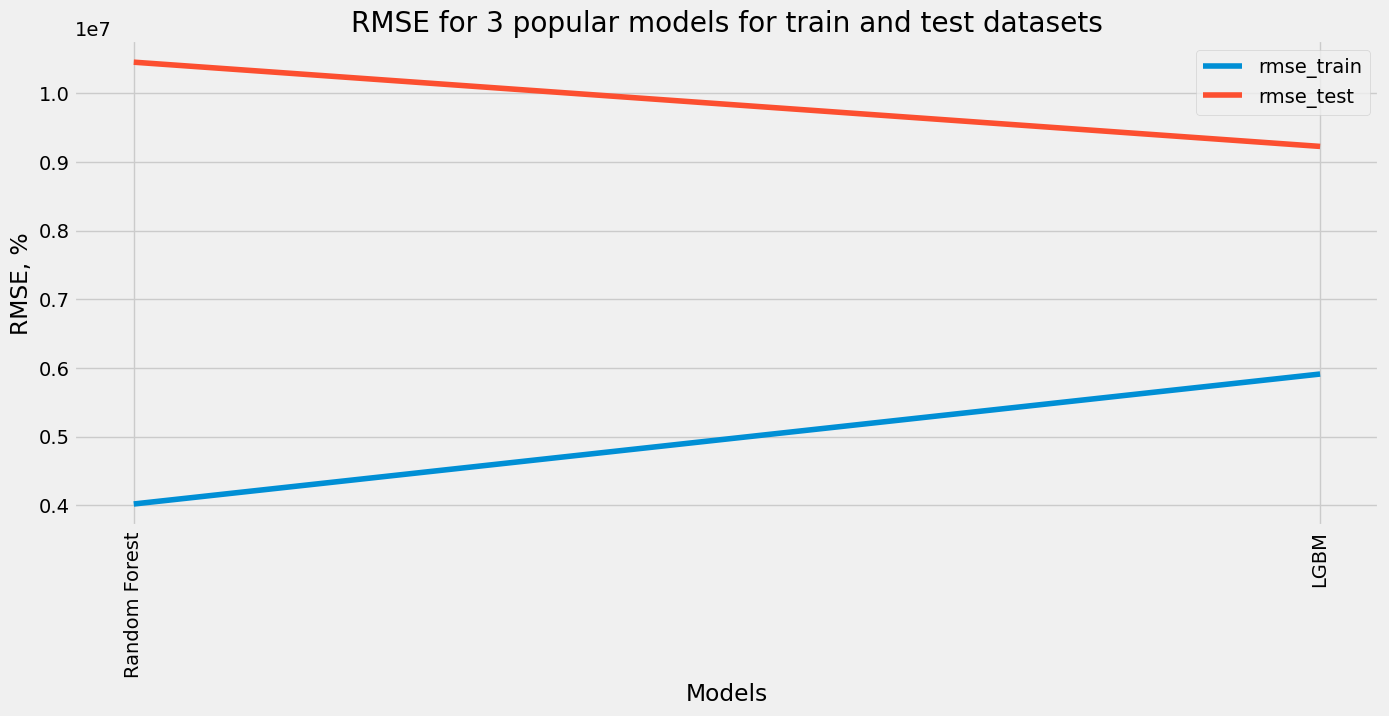

In [127]:
plt.figure(figsize=[15,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['rmse_train'], label = 'rmse_train')
plt.plot(xx, models['rmse_test'], label = 'rmse_test')
plt.legend()
plt.title('RMSE for 3 popular models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('RMSE, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()

In [128]:
test0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 744 entries, 2639 to 3278
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       744 non-null    int32  
 1   bathrooms      744 non-null    float64
 2   sqft_living    744 non-null    int64  
 3   floors         744 non-null    int32  
 4   waterfront     744 non-null    int64  
 5   view           744 non-null    int64  
 6   condition      744 non-null    int64  
 7   sqft_above     744 non-null    int64  
 8   sqft_basement  744 non-null    int64  
 9   yr_built       744 non-null    int64  
 10  yr_renovated   744 non-null    int64  
 11  street         744 non-null    int32  
 12  city           744 non-null    int32  
 13  statezip       744 non-null    int32  
 14  country        744 non-null    int32  
dtypes: float64(1), int32(6), int64(8)
memory usage: 75.6 KB


In [129]:
test0.head(3)

bedrooms  bathrooms  sqft_living  floors  waterfront  view  condition  \
2639         3       1.75         2240       2           0     0          5   
1824         2       2.50         2680       1           0     0          3   
2169         3       1.75         2210       1           0     0          3   

      sqft_above  sqft_basement  yr_built  yr_renovated  street  city  \
2639        2240              0      1976             0    1085    41   
1824        2680              0      2006             0    2064    31   
2169        1390            820      1958          2004    1691     3   

      statezip  country  
2639        40        0  
1824        32        0  
2169         4        0

In [130]:
testn = pd.DataFrame(scaler.transform(test0), columns = test0.columns)

In [131]:
lgb_predict = modelL.predict(test0)
lgb_predict[:3]

array([478941.14717995, 721220.23088857, 601694.56534842])

In [132]:
final_df = test_target0.values
final_df = pd.DataFrame(final_df,columns=['Real_price'])
final_df['predicted_prices'] = lgb_predict.astype(int)
final_df['difference'] = abs(final_df['Real_price'] - final_df['predicted_prices']).astype(int)
final_df.head(20)

Real_price  predicted_prices  difference
0       550000            478941       71059
1       930000            721220      208780
2       625000            601694       23306
3       399950            407911        7961
4       530000            656983      126983
5       723000            647471       75529
6       250000            336600       86600
7       657500            725325       67825
8       320000            307449       12551
9       594950            675846       80896
10      520000            519589         411
11      523950            472428       51522
12      335000            435410      100410
13      800000            534792      265208
14      949880            724477      225403
15      857000            906172       49172
16      272000            211994       60006
17      800000            682545      117455
18      263000            279872       16872
19      394475            353856       40619